# The Big Data Challenge

# Import packages

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import requests


# Stringency data by country

In [2]:
# Read in stringency data
file = (
    "Big Data Challenge_ Data and Challenge Statements/Data/Stringency data/OxCGRT_latest_hackathon.csv"
)
stringency = pd.read_csv(file, parse_dates=['Date'], usecols=['CountryName', 'Date', 
                                                              'StringencyIndex', 'ConfirmedCases',
                                                             'ConfirmedDeaths'])
print(stringency.head())

  CountryName       Date  ConfirmedCases  ConfirmedDeaths  StringencyIndex
0       Aruba 2020-01-01             NaN              NaN              0.0
1       Aruba 2020-01-02             NaN              NaN              0.0
2       Aruba 2020-01-03             NaN              NaN              0.0
3       Aruba 2020-01-04             NaN              NaN              0.0
4       Aruba 2020-01-05             NaN              NaN              0.0


In [3]:
# Check for missing values
print(stringency.isna().sum())

CountryName            0
Date                   0
ConfirmedCases     10426
ConfirmedDeaths    10426
StringencyIndex     1382
dtype: int64


## Reformat data

In [4]:
# Create new columns with Year and Month
stringency.loc[:,'Year'] = stringency.loc[:,'Date'].dt.year
stringency.loc[:,'Month'] = stringency.loc[:,'Date'].dt.month_name()
stringency.loc[:,'day'] = stringency.loc[:,'Date'].dt.day
print(stringency.head())


  CountryName       Date  ConfirmedCases  ConfirmedDeaths  StringencyIndex  \
0       Aruba 2020-01-01             NaN              NaN              0.0   
1       Aruba 2020-01-02             NaN              NaN              0.0   
2       Aruba 2020-01-03             NaN              NaN              0.0   
3       Aruba 2020-01-04             NaN              NaN              0.0   
4       Aruba 2020-01-05             NaN              NaN              0.0   

   Year    Month  day  
0  2020  January    1  
1  2020  January    2  
2  2020  January    3  
3  2020  January    4  
4  2020  January    5  


In [5]:
#Drop all rows except EU countries we have electricity data for plus UK and except Malta because we don't have stringency or electricity data

#create list of all relevant countries
Europe = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 
      'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Netherlands', 'Austria', 
      'Poland', 'Portugal', 'Romania','Slovenia', 'Slovak Republic', 'Finland', 'Sweden', 'United Kingdom']

#note that in the stringency data, Czechia is called Czech Republic and Slovakia is referred to as Slovak Republic.

stringency_filtered = stringency.query('CountryName in ["Belgium", "Bulgaria", "Czech Republic", "Denmark", "Germany", "Estonia", "Ireland", "Greece", "Spain", "France", "Croatia", "Italy", "Cyprus", "Latvia", "Lithuania", "Luxembourg", "Hungary", "Netherlands", "Austria", "Poland", "Portugal", "Romania","Slovenia", "Slovak Republic", "Finland", "Sweden", "United Kingdom"]') 

stringency_filtered.query('CountryName == "United Kingdom"')



,CountryName,Date,ConfirmedCases,ConfirmedDeaths,StringencyIndex,Year,Month,day
13688,United Kingdom,2020-01-01,0.0,0.0,0.0,2020,January,1
13689,United Kingdom,2020-01-02,0.0,0.0,0.0,2020,January,2
13690,United Kingdom,2020-01-03,0.0,0.0,0.0,2020,January,3
13691,United Kingdom,2020-01-04,0.0,0.0,0.0,2020,January,4
13692,United Kingdom,2020-01-05,0.0,0.0,0.0,2020,January,5
...,...,...,...,...,...,...,...,...
13915,United Kingdom,2020-08-15,316367.0,41358.0,NaN,2020,August,15
13916,United Kingdom,2020-08-16,317444.0,41361.0,NaN,2020,August,16
13917,United Kingdom,2020-08-17,318484.0,41366.0,NaN,2020,August,17
13918,United Kingdom,2020-08-18,319197.0,41369.0,NaN,2020,August,18


# Electricity data for the UK

In [6]:
# Read in electricity data
file3 = ("Big Data Challenge_ Data and Challenge Statements/Data/Electricity data/ET_5.5_AUG_20.xls")

electricity = pd.read_excel(file3, sheet_name='Month', usecols=['YEAR', 'MONTH', 'electricity '], header=[7], skiprows= [i for i in range(8, 273) ])
print(electricity)

                       YEAR      MONTH  electricity 
0                      2017    January     29.860327
1                      2017   February     26.207024
2                      2017      March     26.369292
3                      2017      April     24.043366
4                      2017        May     24.157889
5                      2017       June     22.589158
6                      2017       July     23.254473
7                      2017     August     23.576351
8                      2017  September     23.683497
9                      2017    October     25.338122
10                     2017   November     27.786430
11                     2017   December     29.302651
12                     2018    January     28.582218
13                     2018   February     27.061782
14                     2018      March     29.225837
15                     2018      April     25.640237
16                     2018        May     23.697955
17                     2018       June     22.

In [7]:
# Rename electicity column
electricity = electricity.rename(columns={'electricity ':'Total consumption of electricity used (all providers) TWh', 'YEAR':'Year', 'MONTH':'Month'})
print(electricity.head())

   Year     Month  Total consumption of electricity used (all providers) TWh
0  2017   January                                          29.860327        
1  2017  February                                          26.207024        
2  2017     March                                          26.369292        
3  2017     April                                          24.043366        
4  2017       May                                          24.157889        


In [8]:
# Remove rows containing nan in a specific column
electricity = electricity[pd.notnull(electricity['Month'])]

In [9]:
# Check for missing values
print(electricity.isna().sum())

Year                                                         0
Month                                                        0
Total consumption of electricity used (all providers) TWh    0
dtype: int64


In [10]:
## Create a date column so that we can merge on date - use 15th just as median date 
## NOTE THIS IS NOT A REAL DATE, only MONTH AND YEAR are correct
electricity['day'] = '15'
# Combine day, month and year of birth into one column
electricity['Date'] =  electricity['Year'].astype(str).str.zfill(4) + "-" + electricity['Month'].astype(str).str.zfill(2) + "-" + electricity['day'].astype(str).str.zfill(2)
# Convert date of birth column into datetime
electricity['Date'] = electricity['Date'].astype('datetime64[ns]')

print(electricity['Date'])


0    2017-01-15
1    2017-02-15
2    2017-03-15
3    2017-04-15
4    2017-05-15
5    2017-06-15
6    2017-07-15
7    2017-08-15
8    2017-09-15
9    2017-10-15
10   2017-11-15
11   2017-12-15
12   2018-01-15
13   2018-02-15
14   2018-03-15
15   2018-04-15
16   2018-05-15
17   2018-06-15
18   2018-07-15
19   2018-08-15
20   2018-09-15
21   2018-10-15
22   2018-11-15
23   2018-12-15
24   2019-01-15
25   2019-02-15
26   2019-03-15
27   2019-04-15
28   2019-05-15
29   2019-06-15
30   2019-07-15
31   2019-08-15
32   2019-09-15
33   2019-10-15
34   2019-11-15
35   2019-12-15
36   2020-01-15
37   2020-02-15
38   2020-03-15
39   2020-04-15
40   2020-05-15
41   2020-06-15
Name: Date, dtype: datetime64[ns]


In [68]:
#add column to the electricity to specify the country since it will be added to other data
electricity['CountryName'] = 'United Kingdom'
electricity = electricity[['CountryName', 'Date', 'Total consumption of electricity used (all providers) TWh', 'Year', 'Month', 'day']]


#making a smaller GB electricity data frame that only includes CountryName, TWh, Year, and Month
GB_elec = electricity[['CountryName', 'Year', 'Month', 'Total consumption of electricity used (all providers) TWh']]
GB_elec.columns = ['CountryName', 'Year', 'Month', 'TWh']
GB_elec

,CountryName,Year,Month,TWh
0,United Kingdom,2017,January,29.860327
1,United Kingdom,2017,February,26.207024
2,United Kingdom,2017,March,26.369292
3,United Kingdom,2017,April,24.043366
4,United Kingdom,2017,May,24.157889
5,United Kingdom,2017,June,22.589158
6,United Kingdom,2017,July,23.254473
7,United Kingdom,2017,August,23.576351
8,United Kingdom,2017,September,23.683497
9,United Kingdom,2017,October,25.338122


In [12]:
stringency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42920 entries, 0 to 42919
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CountryName      42920 non-null  object        
 1   Date             42920 non-null  datetime64[ns]
 2   ConfirmedCases   32494 non-null  float64       
 3   ConfirmedDeaths  32494 non-null  float64       
 4   StringencyIndex  41538 non-null  float64       
 5   Year             42920 non-null  int64         
 6   Month            42920 non-null  object        
 7   day              42920 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 2.6+ MB


In [13]:
print(electricity.shape)
print(stringency.shape)

(42, 6)
(42920, 8)


# Electricity data for EU countries

In [65]:
#read csv
EU_elec = pd.read_csv('Electricity/EU_electricity_data.csv')

#rename columns
EU_elec.rename(columns={'Unnamed: 0': 'CountryName'}, inplace = True)

#set index to countryname so I can stack
EU_elec.set_index('CountryName', inplace = True)
#stack so that date becomes a column, rather than each date having its own column
EU_elec = EU_elec.stack()

#reset the index
EU_elec = EU_elec.reset_index(drop = False)

#rename the columns
EU_elec.columns = ['CountryName', 'Month-Year', 'GWh']
EU_elec

,CountryName,Month-Year,GWh
0,Belgium,Jan-16,"7,749"
1,Belgium,Feb-16,"7,293"
2,Belgium,Mar-16,"7,511"
3,Belgium,Apr-16,"6,833"
4,Belgium,May-16,"6,635"
...,...,...,...
805,Sweden,Feb-20,"12,062"
806,Sweden,Mar-20,"11,902"
807,Sweden,Apr-20,"10,500"
808,Sweden,May-20,"10,169"


In [66]:

#split Month-Year into one month column and one year column 
EU_elec['test'] = EU_elec['Month-Year'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%b-%y'))

EU_elec['Year Month'] = EU_elec.test.apply(lambda x: x.strftime("%Y"))
EU_elec['Month'] = EU_elec.test.apply(lambda x: x.strftime("%B"))

#drop two unused date-related columns
EU_elec.drop(['Month-Year', 'test'], axis = 1, inplace = True)


#convert GWh into TWh so it's compatable with the UK data. 

EU_elec['TWh'] = [float(z.replace(',', ''))/1000 for z in EU_elec['GWh']]

#drop GWh column now that it has been converted

EU_elec.drop(['GWh'], axis = 1, inplace = True)

EU_elec = EU_elec[['CountryName', 'Year','Month', 'TWh']]
EU_elec


,CountryName,Year,Month,TWh
0,Belgium,2016,January,7.749
1,Belgium,2016,February,7.293
2,Belgium,2016,March,7.511
3,Belgium,2016,April,6.833
4,Belgium,2016,May,6.635
...,...,...,...,...
805,Sweden,2020,February,12.062
806,Sweden,2020,March,11.902
807,Sweden,2020,April,10.500
808,Sweden,2020,May,10.169


## Merge Electricity data for EU and UK

In [70]:
print(EU_elec.shape)
print(GB_elec.shape)

full_elec = EU_elec.append(GB_elec, ignore_index= True)
full_elec


(810, 4)
(42, 4)


,CountryName,Year,Month,TWh
0,Belgium,2016,January,7.749000
1,Belgium,2016,February,7.293000
2,Belgium,2016,March,7.511000
3,Belgium,2016,April,6.833000
4,Belgium,2016,May,6.635000
...,...,...,...,...
847,United Kingdom,2020,February,25.986530
848,United Kingdom,2020,March,25.892542
849,United Kingdom,2020,April,20.885840
850,United Kingdom,2020,May,20.533198


##  Merge country data 

In [16]:
stringency.day = stringency.day.astype(str)

country_data = electricity.merge(stringency, on='Date', how='outer')
print(country_data)
country_data.to_csv("Big Data Challenge_ Data and Challenge Statements/Data/country_data.csv")

        CountryName_x       Date  \
0      United Kingdom 2017-01-15   
1      United Kingdom 2017-02-15   
2      United Kingdom 2017-03-15   
3      United Kingdom 2017-04-15   
4      United Kingdom 2017-05-15   
...               ...        ...   
42951             NaN 2020-08-19   
42952             NaN 2020-08-19   
42953             NaN 2020-08-19   
42954             NaN 2020-08-19   
42955             NaN 2020-08-19   

       Total consumption of electricity used (all providers) TWh Year_x  \
0                                              29.860327           2017   
1                                              26.207024           2017   
2                                              26.369292           2017   
3                                              24.043366           2017   
4                                              24.157889           2017   
...                                                  ...            ...   
42951                                     

In [17]:
country_data.head(50)



,CountryName_x,Date,Total consumption of electricity used (all providers) TWh,Year_x,Month_x,day_x,CountryName_y,ConfirmedCases,ConfirmedDeaths,StringencyIndex,Year_y,Month_y,day_y
0,United Kingdom,2017-01-15,29.860327,2017,January,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom,2017-02-15,26.207024,2017,February,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,2017-03-15,26.369292,2017,March,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,2017-04-15,24.043366,2017,April,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,2017-05-15,24.157889,2017,May,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,United Kingdom,2017-06-15,22.589158,2017,June,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Kingdom,2017-07-15,23.254473,2017,July,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United Kingdom,2017-08-15,23.576351,2017,August,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Kingdom,2017-09-15,23.683497,2017,September,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United Kingdom,2017-10-15,25.338122,2017,October,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Road traffic data by city

In [18]:
# Read in traffic data from ONS
file2 = (
    "Traffic_ONS/10septembertrafficcamerasdataset.xlsx"
)
traffic = pd.read_excel(file2, sheet_name='Seasonally adjusted', header=[0, 1], skiprows=[2, 3], index_col=0)
print(traffic.head())

Daily counts London                                                      \
               Cars Motorbikes Buses Trucks Vans Pedestrians & cyclists   
2020-03-01        *          *     *      *    *                      *   
2020-03-02        *          *     *      *    *                      *   
2020-03-03        *          *     *      *    *                      *   
2020-03-04        *          *     *      *    *                      *   
2020-03-05        *          *     *      *    *                      *   

Daily counts North East                          ... Greater Manchester  \
                   Cars Motorbikes Buses Trucks  ...              Buses   
2020-03-01        55378         18  2249   1130  ...                  *   
2020-03-02        54773         24  2279   1159  ...                  *   
2020-03-03        56045         29  2283   1168  ...                  *   
2020-03-04        53209         20  2262   1150  ...                  *   
2020-03-05        52897 

## Handle missing data

In [19]:
# Replace the asterisk with empty cells
traffic = traffic.replace('*', '')
print(traffic)

Daily counts  London                                                         \
                Cars Motorbikes  Buses Trucks   Vans Pedestrians & cyclists   
2020-03-01                                                                    
2020-03-02                                                                    
2020-03-03                                                                    
2020-03-04                                                                    
2020-03-05                                                                    
...              ...        ...    ...    ...    ...                    ...   
2020-09-02    272143        548  17811  17905  39621                  41057   
2020-09-03    276908        598  18234  18855  40927                  45666   
2020-09-04    275792        594  18004  18385  40294                  46254   
2020-09-05    279997        564  17237  18026  39143                  42122   
2020-09-06    275020        568  16991  17475  38403

## Reformat data

In [20]:
# Melt traffic data
long_traffic = pd.melt(traffic, var_name=['City','Transport mode'], value_name='Count', ignore_index=False)
print(long_traffic)
long_traffic = pd.DataFrame(long_traffic.reset_index())

# Rename date column
long_traffic = long_traffic.rename(columns={"index": "Date"})
print(long_traffic)

               City          Transport mode Count
2020-03-01   London                    Cars      
2020-03-02   London                    Cars      
2020-03-03   London                    Cars      
2020-03-04   London                    Cars      
2020-03-05   London                    Cars      
...             ...                     ...   ...
2020-09-02  Reading  Pedestrians & cyclists    47
2020-09-03  Reading  Pedestrians & cyclists    48
2020-09-04  Reading  Pedestrians & cyclists    48
2020-09-05  Reading  Pedestrians & cyclists    41
2020-09-06  Reading  Pedestrians & cyclists    51

[7980 rows x 3 columns]
           Date     City          Transport mode Count
0    2020-03-01   London                    Cars      
1    2020-03-02   London                    Cars      
2    2020-03-03   London                    Cars      
3    2020-03-04   London                    Cars      
4    2020-03-05   London                    Cars      
...         ...      ...                     

In [21]:
# Create new columns with Year and Month
long_traffic.loc[:,'Year'] = long_traffic.loc[:,'Date'].dt.year
long_traffic.loc[:,'Month'] = long_traffic.loc[:,'Date'].dt.month
print(long_traffic.head())


long_traffic.loc[:,'Year'] = long_traffic.loc[:,'Year'].astype(int)
long_traffic.loc[:, 'Month'] = long_traffic.loc[:, 'Month'].astype(int)
print(long_traffic.info())

        Date    City Transport mode Count  Year  Month
0 2020-03-01  London           Cars        2020      3
1 2020-03-02  London           Cars        2020      3
2 2020-03-03  London           Cars        2020      3
3 2020-03-04  London           Cars        2020      3
4 2020-03-05  London           Cars        2020      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7980 non-null   datetime64[ns]
 1   City            7980 non-null   object        
 2   Transport mode  7980 non-null   object        
 3   Count           7980 non-null   object        
 4   Year            7980 non-null   int32         
 5   Month           7980 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 311.8+ KB
None


AttributeError: 'Line2D' object has no property 'aspect'

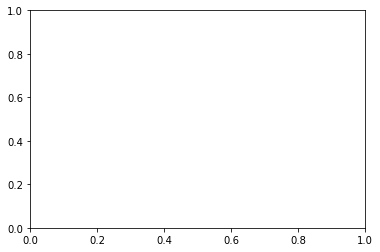

In [22]:
## Check it can plot - just for de-bugging
sns.lineplot(
    data = long_traffic,
    x = 'Month',
    y = 'Count',
    aspect=3
)

# Air quality

In [23]:
# Read in the air quality data -- THIS DOESN'T WORK
url_air = ("http://api.erg.ic.ac.uk/AirQuality/Daily/MonitoringIndex/Latest/GroupName={GROUPNAME}/Json")
# Package the request, send the request and catch the response: r
air = requests.get(url_air)
# Decode the JSON data into a dictionary: json_data
json_data_air = air.json()

# # Print each key-value pair in json_data
# for k in json_data.keys():
#     print(k + ': ', json_data[k])


JSONDecodeError: Expecting value: line 1 column 1 (char 0)